<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

In [4]:
df = pd.read_excel(path)

In [5]:
top_region = df.groupby('Region')['Customer Tenure (Years)'].mean().nlargest(5)
print(top_region)

Region
North    9.250000
West     8.166667
East     6.555556
South    1.000000
Name: Customer Tenure (Years), dtype: float64


In [6]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=4, random_state=42)
df['Customer Segment'] = kmeans_model.fit_predict(df[['Age', 'Total Spent', 'Website Visit Frequency']])
print(df['Customer Segment'].value_counts())

Customer Segment
2    7
1    5
0    4
3    4
Name: count, dtype: int64


In [8]:
from sklearn.linear_model import LinearRegression
X = df[['Age', 'Customer Tenure (Years)']]
y = df['Total Spent']
model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 5.39458247 -0.13640431]
Intercept: 249.284303842567


IndexError: list index out of range

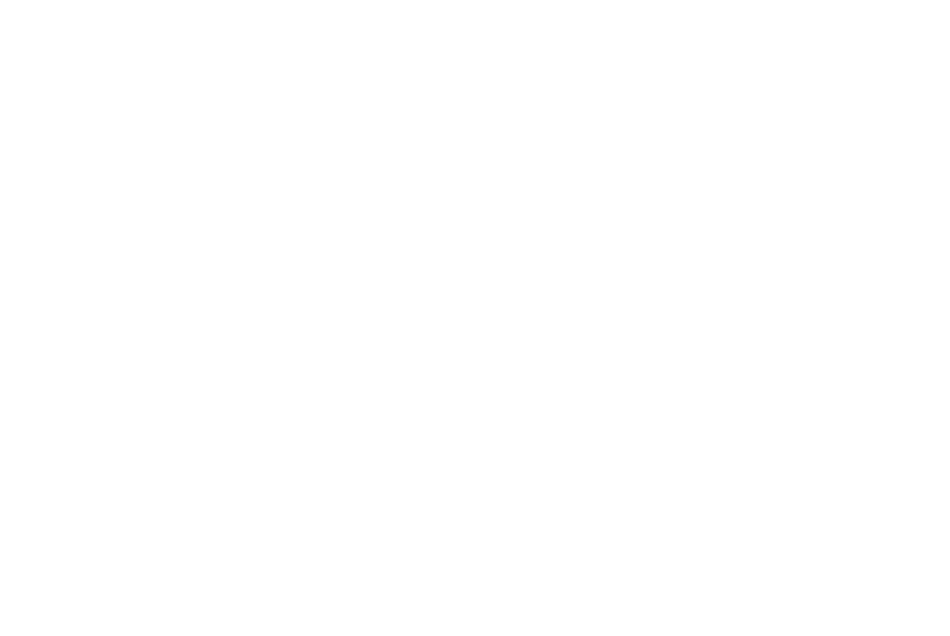

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

X = df[['Age', 'Customer Tenure (Years)']]
y = df['Total Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['Not Converted', 'Converted'], filled=True)
plt.show()

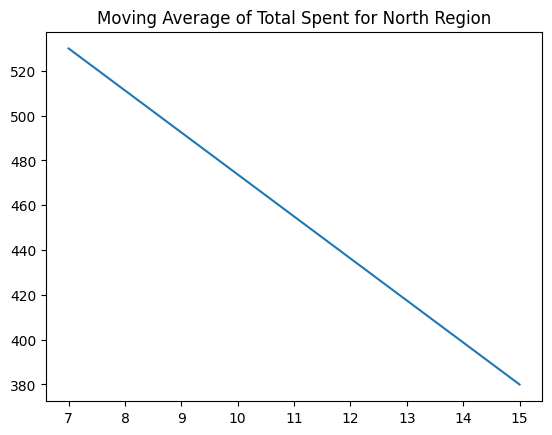

In [15]:
import matplotlib.pyplot as plt

df['Total Spent MA'] = df.groupby('Region')['Total Spent'].transform(lambda x: x.rolling(window=3).mean())
plt.plot(df[df['Region'] == 'North']['Total Spent MA'].head(50))
plt.title('Moving Average of Total Spent for North Region')
plt.show()

In [20]:
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
import pandas as pd

lr = LinearRegression()

df_majority = df[df['Converted'] == 0]
df_minority = df[df['Converted'] == 1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])
lr.fit(df_balanced[['Age', 'Total Spent']], df_balanced['Converted'])

LinearRegression()

In [21]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(
    df[df['Campaign'] == 'Summer Sale']['Total Spent'],
    df[df['Campaign'] == 'Winter Sale']['Total Spent'],
    df[df['Campaign'] == 'Black Friday']['Total Spent']
)
print(f"F-statistic: {f_stat}, p-value: {p_value}")

F-statistic: 0.47581675150393354, p-value: 0.6326160368183384


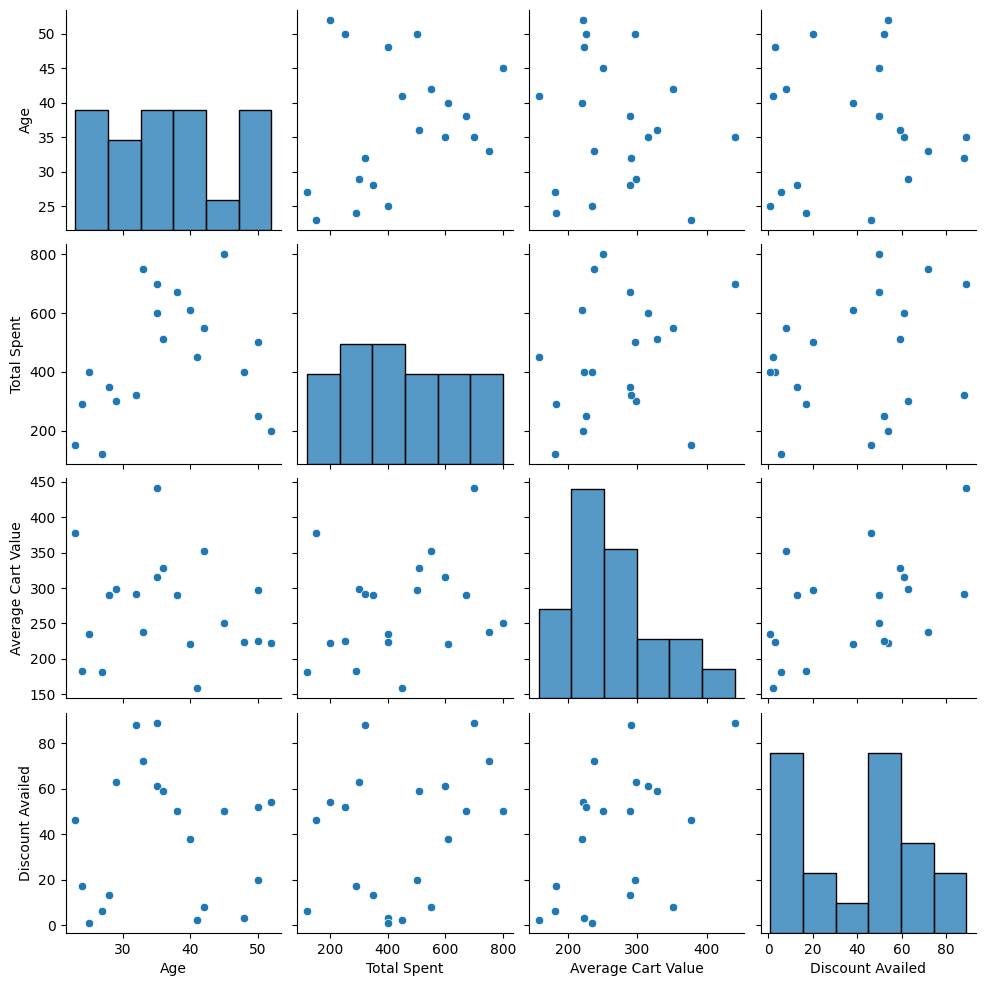

In [22]:
import seaborn as sns
import pandas as pd

sns.pairplot(df[['Age', 'Total Spent', 'Average Cart Value', 'Discount Availed']])
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
X = df[['Age', 'Total Spent', 'Customer Tenure (Years)']]
y = df['Discount Availed']
rf_regressor.fit(X, y)
print("Feature Importances:", rf_regressor.feature_importances_)

Feature Importances: [0.46793914 0.35194866 0.1801122 ]


In [25]:
retention_rate = df[df['Customer Tenure (Years)'] > 5].shape[0] / df.shape[0]
print("Retention Rate:", retention_rate)

Retention Rate: 0.6
